In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cf
from sklearn.cross_validation import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Partitioning data to input and target variable

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

train_pts = train_data.drop('Activity', axis=1)
train_labels = train_data['Activity']

test_pts = test_data.drop('Activity', axis=1)
test_labels = test_data['Activity']

## Classifying after applying PCA

In [4]:
pca = PCA(n_components=200)
train_pca = pca.fit_transform(train_pts, y=train_labels)
# print(pca.explained_variance_ratio_)
test_pca = pca.transform(test_pts)
print(pca.explained_variance_ratio_.sum())

0.998059731672


## Testing KNN

In [4]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pca, train_labels)
    scores = clf.score(test_pca, test_labels)
    k_scores.append(scores)
    # scores = cross_val_score(clf, train, train_labels, cv=10, scoring='accuracy')
    # k_scores.append(scores.mean())
print(k_scores)

[0.79742110620970474, 0.80590430946725489, 0.80624363759755679, 0.81370885646420088, 0.80963691890057687, 0.81744146589752287, 0.80760095011876487, 0.8160841533763149, 0.80760095011876487, 0.81676280963691894, 0.81099423142178484, 0.8160841533763149, 0.81167288768238888, 0.81133355955208686, 0.81235154394299292, 0.81438751272480492, 0.81336952833389886, 0.81438751272480492, 0.81574482524601288, 0.81167288768238888, 0.81303020020359684, 0.81642348150661692, 0.81540549711571086, 0.81676280963691894, 0.81642348150661692, 0.81438751272480492, 0.81438751272480492, 0.81744146589752287, 0.8140481845945029, 0.81506616898540885]


## Plotting for various k values

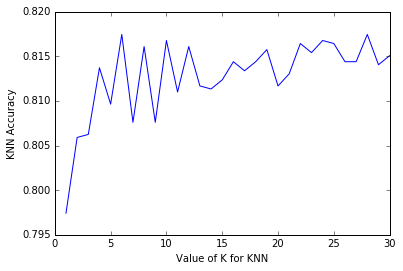

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('KNN Accuracy')
plt.show()

## Testing KNN for training set errors

In [6]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pca, train_labels)
    scores = clf.score(train_pca, train_labels)
    k_scores.append(scores)
    # scores = cross_val_score(clf, train, train_labels, cv=10, scoring='accuracy')
    # k_scores.append(scores.mean())
print(k_scores)

[1.0, 0.9936071817192601, 0.99591947769314471, 0.99238302502720344, 0.98884657236126228, 0.98789445048966262, 0.98408596300326445, 0.98299782372143629, 0.97973340587595215, 0.97782916213275295, 0.97728509249183892, 0.9767410228509249, 0.97293253536452662, 0.97470076169749731, 0.97102829162132753, 0.97116430903155604, 0.96735582154515776, 0.96762785636561477, 0.96354733405875947, 0.96477149075081614, 0.96313928182807396, 0.96259521218715993, 0.96137105549510338, 0.9619151251360174, 0.96055495103373234, 0.96041893362350383, 0.95797062023939061, 0.95783460282916211, 0.95633841131664854, 0.95593035908596302]


## Plotting for various k values

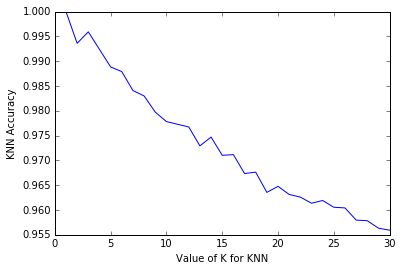

In [7]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('KNN Accuracy')
plt.show()

## Testing KNN for cross validation data

In [6]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pca, train_labels)
    scores = cross_val_score(clf, train_pca, train_labels, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.81991021582499002, 0.81689457614815486, 0.82577618692361143, 0.82344990660288919, 0.83039156976040474, 0.82657497497920662, 0.82959080612863156, 0.83012836036771254, 0.82973092846963892, 0.83041065761878397, 0.82879704402735721, 0.82810899626180901, 0.82525663348021505, 0.82443252577887072, 0.8234875426615742, 0.82321118460519538, 0.82226859712295808, 0.82254052008813194, 0.82186246476525704, 0.82077196976207889, 0.82050171806346273, 0.8214489174567573, 0.82226748495729329, 0.82348848106648265, 0.82335482829748563, 0.82308234167339123, 0.82253756637178521, 0.8215835055714551, 0.82022627872217913, 0.81777152166098177]


## Plotting for various k values

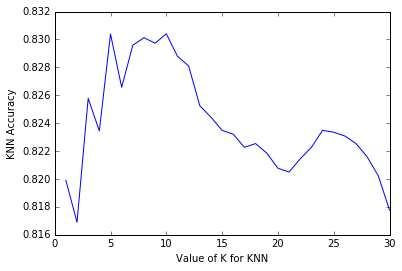

In [7]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('KNN Accuracy')
plt.show()

In [10]:
clf = KNeighborsClassifier(n_neighbors=10,algorithm='brute',p=2,weights='distance')
clf.fit(train_pca, train_labels)
scores = clf.score(test_pca, test_labels)
print scores
print clf

0.811672887682
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')
